# Setup

In [2]:
!pip install openai

['Collecting openai',
 '  Using cached openai-1.56.0-py3-none-any.whl.metadata (24 kB)',
 'Collecting anyio<5,>=3.5.0 (from openai)',
 '  Using cached anyio-4.6.2.post1-py3-none-any.whl.metadata (4.7 kB)',
 'Collecting distro<2,>=1.7.0 (from openai)',
 '  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)',
 'Collecting httpx<1,>=0.23.0 (from openai)',
 '  Using cached httpx-0.28.0-py3-none-any.whl.metadata (7.1 kB)',
 'Collecting jiter<1,>=0.4.0 (from openai)',
 '  Using cached jiter-0.8.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)',
 'Collecting pydantic<3,>=1.9.0 (from openai)',
 '  Downloading pydantic-2.10.3-py3-none-any.whl.metadata (172 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/172.0 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b30.7/172.0 kB\x1b \x1b122.3 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━\x1b\x1b

In [5]:
!pip install python-dotenv

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [8]:
!pip install -U langchain openai langchain-chroma langchain-experimental # (newest versions required for multi-modal)

  Using cached langchain-0.3.9-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_chroma-0.1.4-py3-none-any.whl.metadata (1.6 kB)
  Using cached langchain_experimental-0.3.3-py3-none-any.whl.metadata (1.7 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached SQLAlchemy-2.0.36-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
  Using cached aiohttp-3.11.9-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached langchain_core-0.3.21-py3-none-any.whl.metadata (6.3 kB)
  Using cached langchain_text_splitters-0.3.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Usin

In [9]:
!pip install "unstructured[all-docs]==0.10.19" pillow pydantic lxml pillow matplotlib tiktoken open_clip_torch torch

  Using cached unstructured-0.10.19-py3-none-any.whl.metadata (24 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached lxml-5.3.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached matplotlib-3.9.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tiktoken-0.8.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached open_clip_torch-2.29.0-py3-none-any.whl.metadata (31 kB)
  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.

In [6]:
import os
import openai
import sys
sys.path.append('../..')

# Load environment
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

# Set the OpenAI API key
openai.api_key  = os.environ['OPENAI_API_KEY']

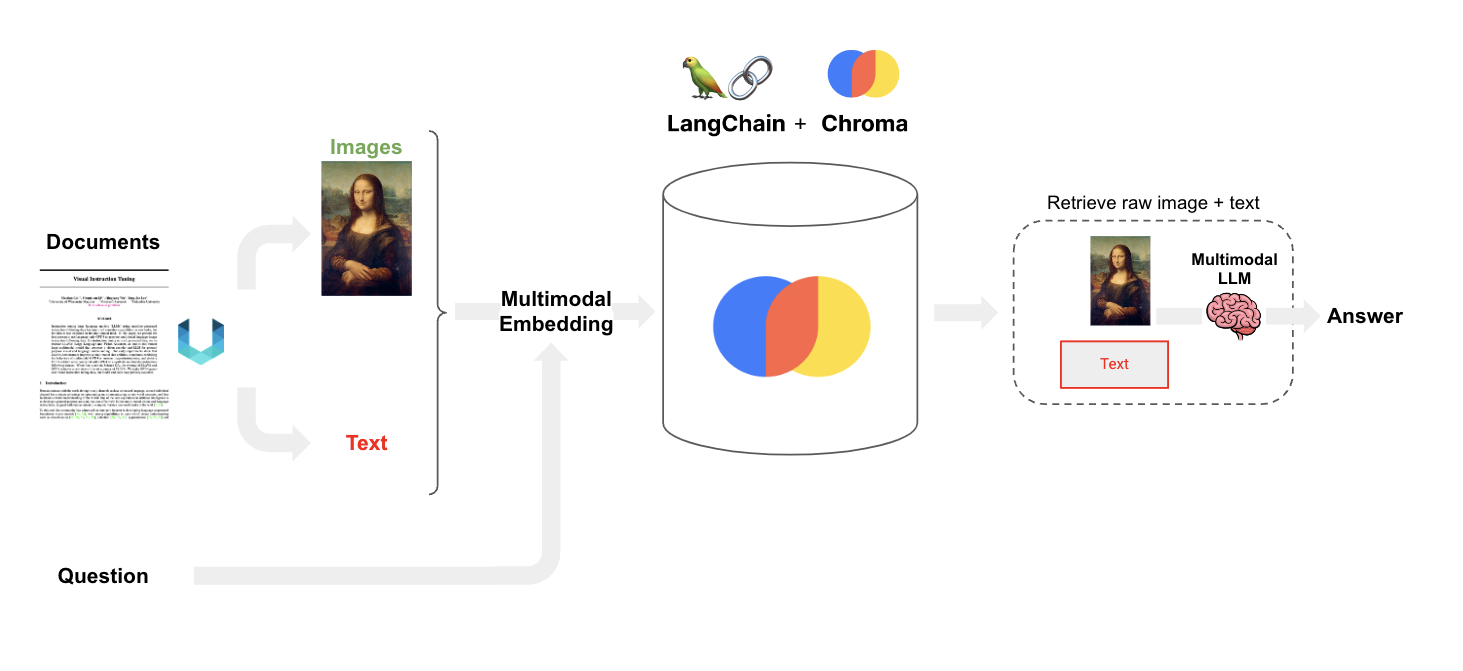

In [12]:
import os
from unstructured.partition.pdf import partition_pdf

# Define the correct path
path = "data/" 

# Check if file exists
if not os.path.exists(path):
    raise FileNotFoundError(f"The file at path {path} does not exist.")

# Extract image, tables, and chunk text
raw_pdf_elements = partition_pdf(
    filename=path + "multimodal_data_2.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=os.path.dirname(path),
)

ModuleNotFoundError: No module named 'unstructured'

In [13]:
# Categorize text elements by type 
tables = []
texts = []

for elements in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

NameError: name 'raw_pdf_elements' is not defined

# Multimodal Embeddings 

In [14]:
import os 
import uuid

import chromadb 
import numpy as numpy
from langchain_chroma import Chroma 
from langchain_experimental.open_clip import OpenCLIPEmbeddings 
from PIL import Image as _PILImage 

# Create chroma 
vectorstore = Chroma(
    collection_name="mm_rag_clip_photos", embedding_function=OpenCLIPEmbeddings()
)

# Get image uri with extension 
images_uris = sorted(
    [
        os.path.join(path, image_name)
        for image_name in os.listdir(path)
        if image_name.endswith(".jpg")
    ]
)

# add image 
vectorstore.add_images(uris=images_uris)

# add documents 
vectorstore.add_texts(texts=texts)

# make retriever 
retriever = vectorstore.as_retriever()

ModuleNotFoundError: No module named 'PIL'

# RAG 

In [15]:
import base64
import io 
from io import BytesIO

import numpy as np 
from PIL import Image 

# function to resize image and encoded as base64 string 
def resize_base64_image(base64_string, size=(128, 128)):
    # decode the base64 string 
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # resize image 
    resized_img = img.resize(size, Image.LANCZOS)

    # save the resized image to a bytes buffer 
    buffered = io.BytesIO()
    resized_img.save(buffered.getvalue()).decode("utf-8")

# function to checking if a string is base64
def is_base64():
    try:
        return base64.b64encode(base64.b64decode(s)) == s.encode()
    except Exception:
        return False 

# split numpy array images and texts 
def split_image_text_types(docs):
    images = []
    text = []
    for doc in docs:
        # extract doc contents 
        doc = doc.page_content 
        if is_base64(doc):
            # resize image 
            images.append(
                resize_base64_image(doc, size=(250, 250))
            )
        else:
            text.append(doc)
    return {"images": images, "texts": texts}


ModuleNotFoundError: No module named 'PIL'

In [11]:
from operator import itemgetter

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_openai import ChatOpenAI

# join the context texts into a single string 
def prompt_func(data_dict):
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []
    
    # adding image 
    if data_dict(["context"]["images"]):
        image_message = {
            "type": "image_url",
            "image_url": {
                "url" : f"data: image/jpeg;base64,{data_dict['context']['images'][10]}"
            },
        }
        messages.append(image_message)
        
        # adding the text message for analysis 
        text_message = {
            "type" : "text",
            "text" : (
                """ As an expert art crititc and historian, your task is to analyze and interpret images,
                considering their historical and cultural significance. Alongside the images, you will be provided with related text
                to offer context. Both will be retrieved from a vectorstore based on user-input keywords. Please use your extensive knowledge and analytical skilss
                to provide a comprehensive summary that includes:
                - A detailed decriptions of the visual elements in the image
                - The historical and cultural context of the image
                - An interpretation of the image's symbolism and meaning 
                - Connections between the image and related text
                
                f "User-provided keywords: {data_dict['question']}"
                Text and Tables: \n
                f"{formatted_texts}"
                """
            ),
        }
        messages.append(text_message)
        
        return [HumanMessage(content=messages)]
    
model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1023)

# RAG pipeline 
chain = (
    {
        "context" : retriever | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(prompt_func)
    | model
    |StrOutputParser()
)

<>:14: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:14: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?


PydanticUserError: The `__modify_schema__` method is not supported in Pydantic v2. Use `__get_pydantic_json_schema__` instead in class `SecretStr`.

For further information visit https://errors.pydantic.dev/2.10/u/custom-json-schema

# Test 

In [ ]:
from IPython.display import HTML, display


def plt_img_base64(img_base64):
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))


docs = retriever.invoke("Woman with children", k=10)
for doc in docs:
    if is_base64(doc.page_content):
        plt_img_base64(doc.page_content)
    else:
        print(doc.page_content)

In [ ]:
chain.invoke("Woman with children")